# Candlestick chart

#### Candlestick graph plots the time, open, close, high, low as a vertical line ranging from low to high. 
It uses a rectangular bar to represent the open-close span. If close >= open, use colorup to color the bar, otherwise use colordown.

In [121]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
style.use('seaborn')
% matplotlib inline

In [122]:
df=pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

###  RESAMPLE is a method for frequency conversion and resampling of time series.
Object must have a datetime-like index (```DatetimeIndex```, ```PeriodIndex```, or ```TimedeltaIndex```).

Here, we are going to, _Downsample the daily volume into 10 Day bins and sum the volumes falling into a bin._
The size of the dataset significantly shrinks.
#### OHLC is used for companies that have stock splits. Tesla never had a stock splits.

In [140]:
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_ohlc.tail() # ohlc based on every 10 days of data

,open,high,low,close
Date,,,,
2017-07-22,342.519989,343.850006,323.470001,323.470001
2017-08-01,319.570007,365.220001,319.570007,355.399994
2017-08-11,357.869995,363.799988,347.459991,347.459991
2017-08-21,337.859985,353.179993,337.859985,353.179993
2017-08-31,355.899994,355.899994,355.899994,355.899994


In [141]:
df_volume=df['Volume'].resample('10D').sum()
df_volume.tail()

Date
2017-07-22    42165000
2017-08-01    71957800
2017-08-11    25803300
2017-08-21    35091200
2017-08-31     4072800
Freq: 10D, Name: Volume, dtype: int64

### Reset the index so that date is now a column

In [142]:
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


### Convert it to _mdates_

In [143]:
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)
df_ohlc.tail()

,Date,open,high,low,close
258,736532.0,342.519989,343.850006,323.470001,323.470001
259,736542.0,319.570007,365.220001,319.570007,355.399994
260,736552.0,357.869995,363.799988,347.459991,347.459991
261,736562.0,337.859985,353.179993,337.859985,353.179993
262,736572.0,355.899994,355.899994,355.899994,355.899994


### Plotting
`xaxis_date()` takes mdates and display them as beautiful dates
`candlestick_ohlc(axis, data, widthofsticks, colorup/down)`

__A plot__
```python
 ax.plot(x, y, lw=2)```
__A fill_between__
```python
 ax.fill_between(x, pricemin, y, facecolor='blue', alpha=0.5)
```
**fil_between** function generates a shaded region between a min and max boundary that is useful for illustrating ranges. It has a very handy where argument to combine filling with logical ranges, e.g., to just fill in a curve over some threshold value.

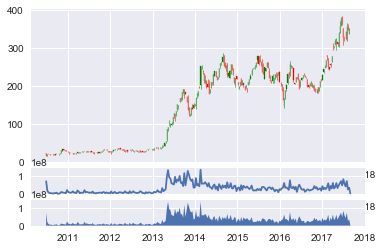

In [157]:
ax1=plt.subplot2grid((7,1),(0,0),rowspan=5, colspan=1)
ax2=plt.subplot2grid((7,1),(5,0),rowspan=1, colspan=1,sharex=ax1)
ax3=plt.subplot2grid((7,1),(6,0),rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.plot(df_volume.index.map(mdates.date2num), df_volume.values)
ax3.fill_between(df_volume.index.map(mdates.date2num), df_volume.values,0)
plt.show()